# Objectives of the project :-
1. Study in detail the load disaggregation and its importance
2. Survey the existing techniques for load disaggregation in the literature.
3. Use your own household dataset or open public access dataset of appliance load consumption.
4. Implement a deep learning model for load disaggregation of various household appliances and compare results with other machine learning techniques.


Load Disaggregation is a broad term covering a range of techniques able to split a household's energy consumption by the individual appliances used.

In [1]:
## Import Basic Libraries ##
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 
import tensorflow as tf
import time 
import dateutil

## Load the data from the csv file


In [4]:
data=pd.read_csv("/content/KAG_energydata_complete.csv")
#make the column names in lower case
data.columns=[x.lower() for x in data.columns]
data.head()

,date,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Check if any null values are present in our data!

In [5]:
data.isnull().sum()
#No null values

date           0
appliances     0
lights         0
t1             0
rh_1           0
t2             0
rh_2           0
t3             0
rh_3           0
t4             0
rh_4           0
t5             0
rh_5           0
t6             0
rh_6           0
t7             0
rh_7           0
t8             0
rh_8           0
t9             0
rh_9           0
t_out          0
press_mm_hg    0
rh_out         0
windspeed      0
visibility     0
tdewpoint      0
rv1            0
rv2            0
dtype: int64

Checking unique data in each column 

In [6]:
data.apply(lambda x:len(x.unique()))

date           19735
appliances        92
lights             8
t1               722
rh_1            2547
t2              1650
rh_2            3376
t3              1426
rh_3            2618
t4              1390
rh_4            2987
t5              2263
rh_5            7571
t6              4446
rh_6            9709
t7              1955
rh_7            5891
t8              2228
rh_8            6649
t9               924
rh_9            3388
t_out           1730
press_mm_hg     2189
rh_out           566
windspeed        189
visibility       413
tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

Knowing the basic stastics about the data and information about the data

In [7]:
data.describe()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   t1           19735 non-null  float64
 4   rh_1         19735 non-null  float64
 5   t2           19735 non-null  float64
 6   rh_2         19735 non-null  float64
 7   t3           19735 non-null  float64
 8   rh_3         19735 non-null  float64
 9   t4           19735 non-null  float64
 10  rh_4         19735 non-null  float64
 11  t5           19735 non-null  float64
 12  rh_5         19735 non-null  float64
 13  t6           19735 non-null  float64
 14  rh_6         19735 non-null  float64
 15  t7           19735 non-null  float64
 16  rh_7         19735 non-null  float64
 17  t8           19735 non-null  float64
 18  rh_8         19735 non-null  float64
 19  t9  

Some points about the data :-
1. There are 29 columns in the dataset from which 1 datetime column,2 integer type column and 26 float type column
2.Temperature columns - Temperature inside the house varies between 14.89 Deg & 29.85 Deg , temperatire outside (T6) varies between -6.06 Deg to 28.29 Deg . The reason for this variation is sensors are kept outside the house
3.Humidiy columns - Humidity inside house varies is between 20.60% to 63.36% with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.
4.Appliances - 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high.
5.Target variable is Appliances which needs to be predicted
6.There are no null values in the dataset
7.There are very less unique columns in the lights column which is a categorical column


Feature Engineering 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


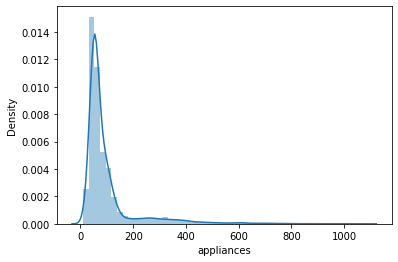

In [9]:
#ploting the distplot
sns.distplot(data['appliances'])

Plotting Box plot to check the outlier in the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


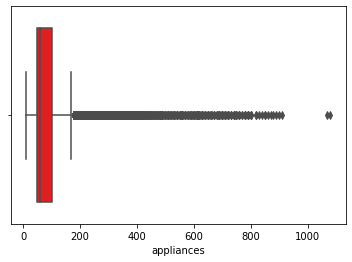

In [11]:
sns.boxplot(data['appliances'],color="red")
# removing extreme 1% of the data
data=data[data['appliances'].between(data['appliances'].quantile(.0),data['appliances'].quantile(.99))]

In [15]:
#Making New columns in the dataset
data['exact_date']=data['date'].str.split(' ').str[0]
data["hours"]=(data['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)
data["seconds"]=((data['date'].str.split(':').str[1])).astype(str).astype(int).mul(60)

data["week"]=(data['date'].str.split(' ').str[0])
data["week"]=(data['week'].apply(dateutil.parser.parse, dayfirst=True))
data["weekday"]=(data['week'].dt.dayofweek).astype(str).astype(int)
data["week"]=(data['week'].dt.day_name())

data['log_appliances'] = np.log(data.appliances)
data['hour*lights'] = data.hours * data.lights
data['hour_avg'] = list(map(dict(data.groupby('hours')["appliances"].mean()).get, data.hours))

#Lets look at our new data!
data.head()

,date,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,rv1,rv2,exact_date,hours,seconds,week,weekday,log_appliances,hour*lights,hour_avg
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,13.275433,2016-01-11,17,0,Tuesday,1,4.094345,510,141.919699
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,18.606195,2016-01-11,17,600,Tuesday,1,4.094345,510,141.919699
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,28.642668,2016-01-11,17,1200,Tuesday,1,3.912023,510,141.919699
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,45.410389,2016-01-11,17,1800,Tuesday,1,3.912023,680,141.919699
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,10.084097,2016-01-11,17,2400,Tuesday,1,4.094345,680,141.919699


## Analysis of data

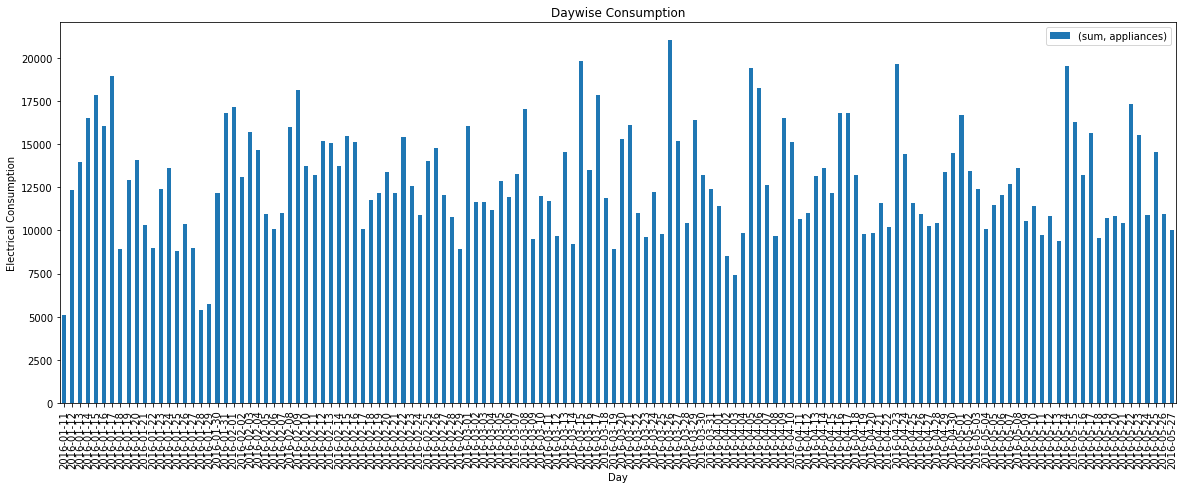

In [18]:
#Day Wise Consumption of Electricity
dates=data['exact_date'].unique()
arranged_day = pd.Categorical(data["exact_date"], categories=dates,ordered=True)
date_series = pd.Series(arranged_day)
table = pd.pivot_table(data,values="appliances",index=date_series, aggfunc=[np.sum],fill_value=0)
table.plot(kind="bar",figsize=(20, 7))
plt.xlabel('Day')
plt.ylabel('Electrical Consumption')
plt.title('Daywise Consumption')
plt.legend()
plt.show()

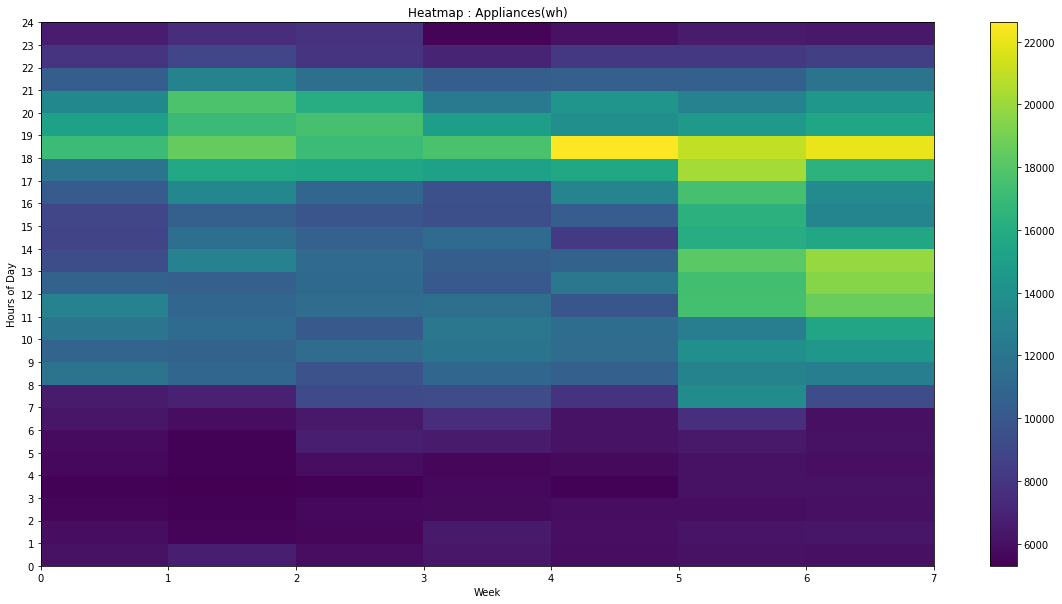

In [21]:
#Heat map 
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
arranged_day = pd.Categorical(data["week"], categories=days,ordered=True)
day_series = pd.Series(arranged_day)
table = pd.pivot_table(data,index=["hours"],
               values="appliances",columns=day_series,
               aggfunc=[np.sum],fill_value=0)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Heatmap : Appliances(wh)')

heatmap = ax.pcolor(table)

ax.set_xlabel("Week Days")
ax.set_ylabel("Hours")

plt.colorbar(heatmap)
ax.set_yticks(range(len(table.index)+1))
ax.set_xticks(range(len(table.columns)+1))

plt.xlabel("Week")
plt.ylabel("Hours of Day")
plt.show()


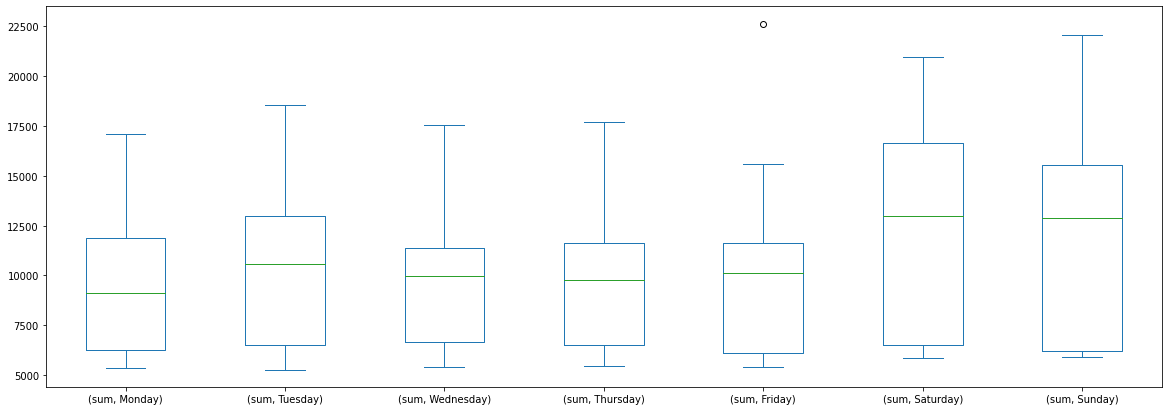

In [22]:
#Checking which day has the most electrical consumption
table.plot.box(figsize=(20, 7))

Saturday and Sunday has the highest amount of electrical consumption greater than 25% compare to weekdays

In [23]:
# Data sets in 30 minitues and 1 hour basis
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
df_hour = data.resample('1H').mean()
df_30min =data.resample('30min').mean()

In [24]:
# Qualitative predictors 
'''We assume that we have low(high) energy load when the appliances consumption is lower(higher) 
   than a given point of the hourly average counsumption. This point is dependent of data time frequency 
   and the numbers below are set after several tryouts based on appliances' consumption standard deviation.
'''

data['low_consum'] = (data.appliances+25<(data.hour_avg))*1
data['high_consum'] = (data.appliances+100>(data.hour_avg))*1

df_hour['low_consum'] = (df_hour.appliances+25<(df_hour.hour_avg))*1
df_hour['high_consum'] = (df_hour.appliances+25>(df_hour.hour_avg))*1

df_30min['low_consum'] = (df_30min.appliances+25<(df_30min.hour_avg))*1
df_30min['high_consum'] = (df_30min.appliances+35>(df_30min.hour_avg))*1

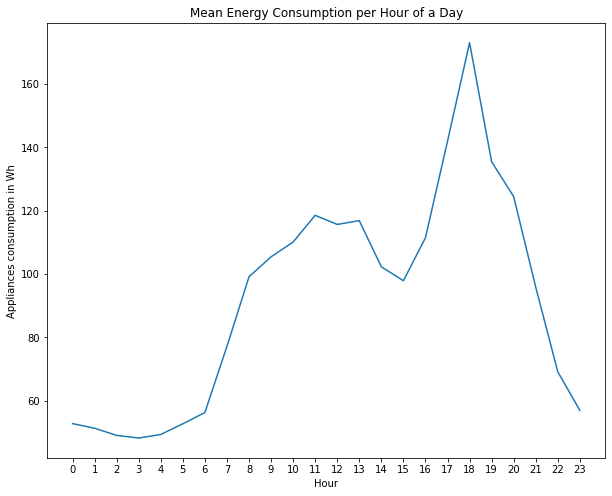

In [25]:
#Plot of Mean Energy Consumption per Hour of a Day
data.groupby('hours')['appliances'].mean().plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

High Electricity consumption of >140Wh is observed during evening hours 16:00 to 20:00. At night hours from 23:00-6:00 the power load is below 50Wh, meaning that most appliances are off or standby. Between 9:00-13:00 the power load is >100Wh and after launch reduces again to <100Wh. At afternoon, the energy consumption ranges from 130-185Wh as family members are at home and many devices are on.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Appliances log(wH)')

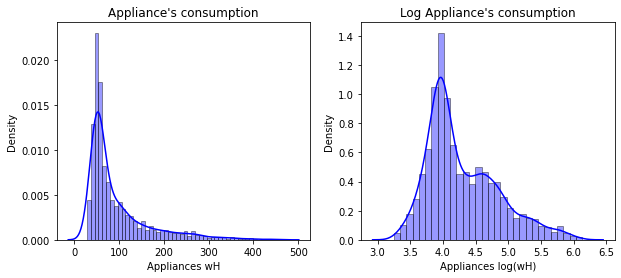

In [26]:
#Histogram of Appliance's consumption
f, axes = plt.subplots(1, 2,figsize=(10,4))

sns.distplot(df_hour.appliances, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[0])
axes[0].set_title("Appliance's consumption")
axes[0].set_xlabel('Appliances wH')

#log transformed data is considered 

sns.distplot(df_hour.log_appliances, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[1])
axes[1].set_title("Log Appliance's consumption")
axes[1].set_xlabel('Appliances log(wH)')

The distribution of power load is not normal as we have left asymetry, for this reason we shall use log(power load) which has closer to normal distribution for further analysis.

Finding  the corelation between the different columns in the dataset 

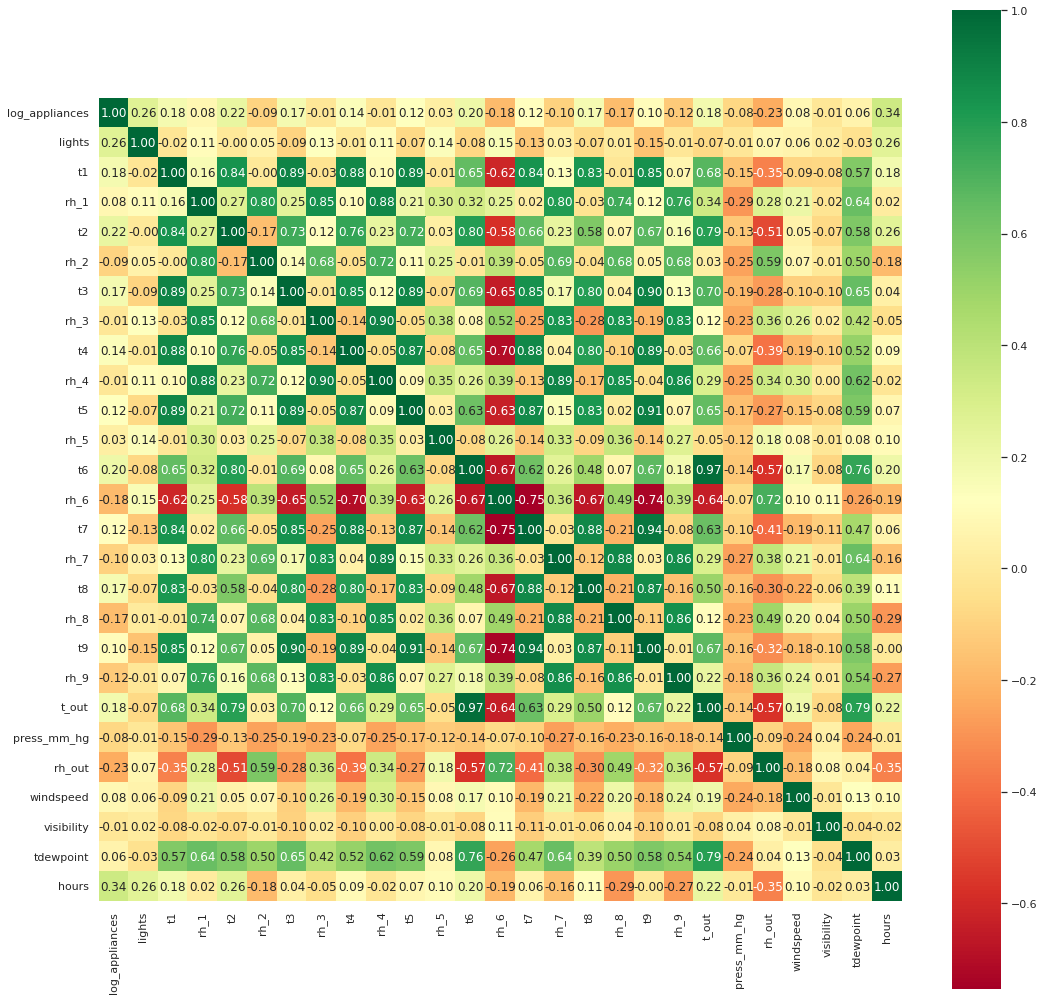

In [27]:
col = ['log_appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3', 'rh_3', 't4',
       'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8', 'rh_8', 't9',
       'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed', 'visibility',
       'tdewpoint','hours']
corr = data[col].corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

From the above correlation heatmap we can see that 
The electrical energy consumption is highly related with :-
1. Hours : 0.34
2. Lights : 0.26
3. T2 : 0.22
4. T6 : 0.26

Pressure column is showing negative correlation with many columns ,also the temperature values are highly corelated with each other specially the termperatures inside the house


Checking if there is any linear relationship between the columns

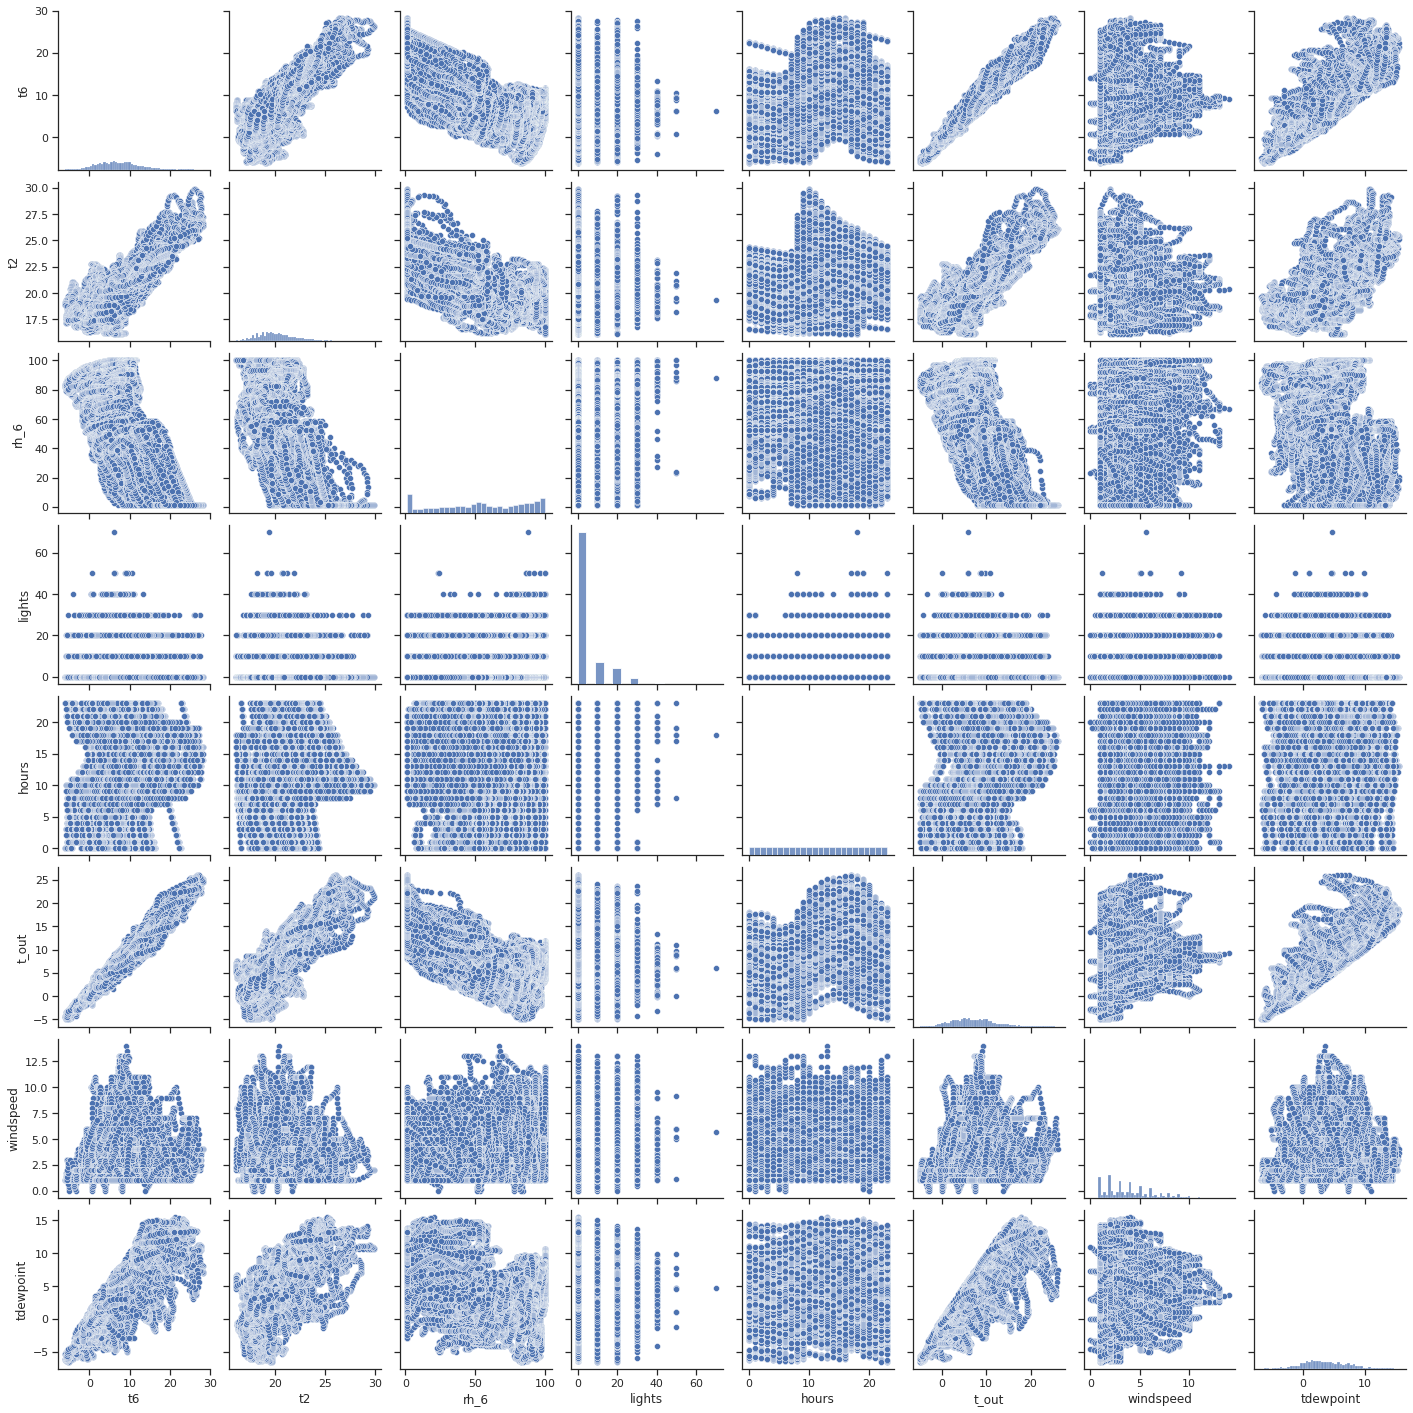

In [28]:
#Linear Dependency evaluation
col = ['t6','t2', 'rh_6','lights','hours','t_out','windspeed','tdewpoint']
sns.set(style="ticks", color_codes=True)
sns.pairplot(data[col])
plt.show();

Transforming categorical variables

In [29]:
for cat_feature in ['weekday', 'hours']:
    df_hour = pd.concat([df_hour, pd.get_dummies(df_hour[cat_feature])], axis=1)
    df_30min = pd.concat([df_30min, pd.get_dummies(df_30min[cat_feature])], axis=1)
    df = pd.concat([data, pd.get_dummies(data[cat_feature])], axis=1)

Generated 3 data sets with time interval 10 minutes, 30 minutes, 1 hour respectively. Using the 1 hour data set for further analysis as it having less noise.

In [38]:
feature_set=['low_consum','high_consum','hours','t6','rh_6','lights','hour*lights',
               'tdewpoint','visibility','press_mm_hg','windspeed']
## to avoid warnings from standardscaler
df_hour.lights = df_hour.lights.astype(float)
df_hour.log_appliances = df_hour.log_appliances.astype(float)
df_hour.hour = df_hour.hours.astype(float)
df_hour.low_consum = df_hour.low_consum.astype(float)
df_hour.high_consum = df_hour.high_consum.astype(float)

Creation of train and test data

In [40]:
test_size=.2
test_index = int(len(df_hour.dropna())*(1-test_size))

x_train, x_test = df_hour[feature_set].iloc[:test_index,], df_hour[feature_set].iloc[test_index:,]
y_train = df_hour.log_appliances.iloc[:test_index,]

y_test =  df_hour.log_appliances.iloc[test_index:,]

In [42]:
#Standardisation
from sklearn.preprocessing import StandardScaler

# Normalizing of X matrices for each model to mean = 0 and standard deviation = 1

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Model Implementation:-

We will be looking at following Algorithms

**Improved Linear regression models**

1.Ridge regression

2.Lasso regression

Support Vector Machine

3.Support vector regression

**Nearest neighbour Regressor**

4.KNeighborsRegressor

**Ensemble models**

5.Random Forest Regressor

6.Gradient Boosting Regressor

7.ExtraTrees Regressor

8.LGBM Regressor


In [44]:
#Ridge Model
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
print('score of ridge_model on test_data', ridge.score(x_test,y_test))

score of ridge_model on test_data 0.24309846191596607


In [45]:
#Lasso Model
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)
print('score of lasso model on test_data',lasso.score(x_test,y_test))

score of lasso model on test_data -0.020467606976526387


In [48]:
#Support vector machine
from sklearn import svm
svr_model = svm.SVR(gamma='scale')
svr_model.fit(x_train,y_train)
y_pred=svr_model.predict(x_test)
print('score of svm model is ',svr_model.score(x_test,y_test))

score of svm model is  0.23669720915585413


In [49]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
k_model=KNeighborsRegressor()
k_model.fit(x_train,y_train)
y_pred=k_model.predict(x_test)
print('score of KneigborsRegressor is ',k_model.score(x_test,y_test))

score of KneigborsRegressor is  0.32022527186735406


In [51]:
#RandomForest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100,random_state=1)            
rf_model.fit(x_train, y_train)
y_pred=rf_model.predict(x_test)
print('score of rf_model is ',rf_model.score(x_test,y_test))

score of rf_model is  0.668946002627122


In [52]:
#Boosting model
import xgboost as xgb
from xgboost import plot_importance
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')
model_xgb.fit(x_train, y_train)
y_pred=model_xgb.predict(x_test)
print('score of xgb_model is ',model_xgb.score(x_test,y_test))


score of rf_model is  0.6841649217300487


In [55]:
#ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
extra_reg=ExtraTreesRegressor()
extra_reg.fit(x_train,y_train)
y_pred=extra_reg.predict(x_test)
print('score of extra_tree_model is ',extra_reg.score(x_test,y_test))


score of extra_tree_model is  0.6807941053845848


In [58]:
#LGBMRegressor
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(num_leaves=41, n_estimators=200)
model_lgb.fit(x_train, y_train)
y_pred=model_lgb.predict(x_test)
print('score of LGBM_Regressor is ',model_lgb.score(x_test,y_test))

score of LGBM_Regressor is  0.6584795027128354


Model Evaluation, Cross-validation & Selection

In [56]:
#Function to Evaluate the models
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Function to evaluate the models
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy))

In [59]:
evaluate(ridge, x_test, y_test)
evaluate(lasso, x_test, y_test)
evaluate(svr_model, x_test, y_test)
evaluate(k_model, x_test, y_test)
evaluate(rf_model, x_test, y_test)
evaluate(model_xgb, x_test, y_test)
evaluate(extra_reg, x_test, y_test)
evaluate(model_lgb, x_test, y_test)

Ridge() 

Average Error       : 0.3056 degrees
Variance score R^2  : 24.31%
Accuracy            : 93.02%

Lasso() 

Average Error       : 0.3695 degrees
Variance score R^2  : -2.05%
Accuracy            : 91.84%

SVR() 

Average Error       : 0.2764 degrees
Variance score R^2  : 23.67%
Accuracy            : 94.02%

KNeighborsRegressor() 

Average Error       : 0.2817 degrees
Variance score R^2  : 32.02%
Accuracy            : 93.73%

RandomForestRegressor(random_state=1) 

Average Error       : 0.1946 degrees
Variance score R^2  : 66.89%
Accuracy            : 95.68%

XGBRegressor(objective='reg:squarederror') 

Average Error       : 0.1911 degrees
Variance score R^2  : 68.42%
Accuracy            : 95.78%

ExtraTreesRegressor() 

Average Error       : 0.1900 degrees
Variance score R^2  : 68.08%
Accuracy            : 95.76%

LGBMRegressor(n_estimators=200, num_leaves=41) 

Average Error       : 0.2008 degrees
Variance score R^2  : 65.85%
Accuracy            : 95.54%



In [61]:
#instead of KFold I use TimeSeriesSplit (10 splits) due to time series data
cv = TimeSeriesSplit(n_splits = 10)

print('Ridge_Model:')
scores = cross_val_score(ridge, x_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(ridge, x_train, y_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('Lasso_Model:')
scores = cross_val_score(lasso, x_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(lasso, x_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('SVM_Model:')
scores = cross_val_score(svr_model, x_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(svr_model, x_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))


print('KNearestNeigbor_Model:')
scores = cross_val_score(k_model, x_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(k_model, x_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('Random_Forest_Model:')
scores = cross_val_score(rf_model, x_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(rf_model, x_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('LGBMRegressor Model:')
scores = cross_val_score(model_lgb, x_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(model_lgb, x_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('XGBRegressor Model:')
scores = cross_val_score(model_xgb, x_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(model_xgb, x_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('ExtraTreeRegressorRegressor Model:')
scores = cross_val_score(extra_reg, x_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(extra_reg, x_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

Ridge_Model:
Accuracy: 99.65 (+/- 0.16) degrees
R^2: 0.26 (+/- 0.29) degrees
Lasso_Model:
Accuracy: 99.55 (+/- 0.13) degrees
R^2: -0.05 (+/- 0.12) degrees
SVM_Model:
Accuracy: 99.71 (+/- 0.09) degrees
R^2: 0.48 (+/- 0.15) degrees
KNearestNeigbor_Model:
Accuracy: 99.69 (+/- 0.09) degrees
R^2: 0.41 (+/- 0.22) degrees
Random_Forest_Model:
Accuracy: 99.73 (+/- 0.21) degrees
R^2: 0.54 (+/- 0.52) degrees
LGBMRegressor Model:
Accuracy: 99.75 (+/- 0.09) degrees
R^2: 0.63 (+/- 0.16) degrees
XGBRegressor Model:
Accuracy: 99.74 (+/- 0.12) degrees
R^2: 0.61 (+/- 0.18) degrees
ExtraTreeRegressorRegressor Model:
Accuracy: 99.76 (+/- 0.09) degrees
R^2: 0.63 (+/- 0.16) degrees


Overall ExtraTreeRegressor is performing the best 

Model performance on test data

In [62]:
y1_pred = ridge.predict(x_test)
y2_pred = lasso.predict(x_test)
y3_pred = svr_model.predict(x_test)
y4_pred = k_model.predict(x_test)
y5_pred = rf_model.predict(x_test)
y6_pred = model_lgb.predict(x_test)
y7_pred = model_xgb.predict(x_test)
y8_pred = extra_reg.predict(x_test)

Prediction of each model vs Test data

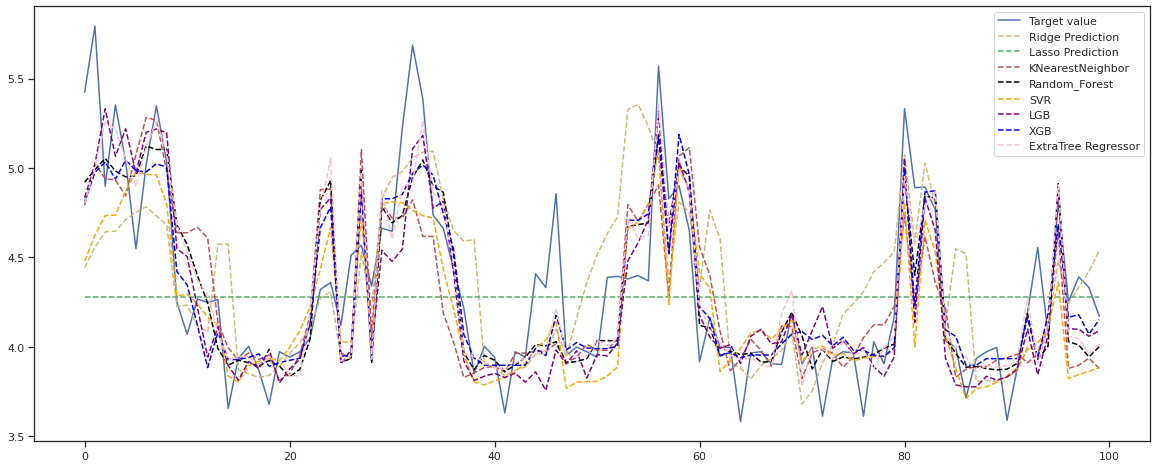

In [63]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test[:100].values,label='Target value',color='b')
plt.plot(y1_pred[:100],label='Ridge Prediction ', linestyle='--', color='y')
plt.plot(y2_pred[:100],label='Lasso Prediction ', linestyle='--', color='g')
plt.plot(y4_pred[:100],label='KNearestNeighbor', linestyle='--', color='r')
plt.plot(y5_pred[:100],label='Random_Forest', linestyle='--', color='black')
plt.plot(y3_pred[:100],label='SVR', linestyle='--', color='orange')
plt.plot(y6_pred[:100],label='LGB', linestyle='--', color='purple')
plt.plot(y7_pred[:100],label='XGB', linestyle='--', color='blue')
plt.plot(y8_pred[:100],label='ExtraTree Regressor', linestyle='--', color='pink')

plt.legend(loc=1)

Paramter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [65]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 200}

In [66]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, n_estimators=200, random_state=40)

In [67]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(x_train,y_train)

1.0

In [68]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(x_test,y_test)

0.6892549848544344

In [69]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(y_test, grid_search.best_estimator_.predict(x_test)))

0.26151272674893133

Observations

Based on parameter tunning step we can see that

1.Best possible parameter combination are - 'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 200

2.Training set R2 score of 1.0 may be signal of overfitting on training set

3.Test set R2 score is 0.69 improvement over 0.63 achieved using untuned model



Deep Learning models:-


Multi Layer Preceptron Regressor(Neural Networks)

In [70]:
#MLP Model
from sklearn.neural_network import MLPRegressor
mlp_reg=MLPRegressor(activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)
mlp_reg.fit(x_train,y_train)
y_pred=mlp_reg.predict(x_test)
print('the score of MLP regressor is',mlp_reg.score(x_test,y_test))

the score of MLP regressor is 0.5142810213493147


In [71]:
evaluate(mlp_reg, x_test, y_test)

MLPRegressor(alpha=0.01, learning_rate='adaptive', learning_rate_init=0.01,
             max_iter=1000) 

Average Error       : 0.2500 degrees
Variance score R^2  : 51.43%
Accuracy            : 94.31%

